In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

In [9]:
from dataset import random_split_train_val

In [10]:
test_dataset = np.loadtxt("THRESHOLD_TEST.txt", delimiter=",")
train_dataset = np.loadtxt("THRESHOLD_ALL.txt", delimiter=",")

In [11]:
# let`s see to 4-th column
X = train_dataset[:,0:600]
Y = train_dataset[:,600]

X_test = test_dataset[:,0:600]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [12]:
# 4-th column = sum of 1,2,3 columns
x = X_train[1].reshape(4, 150)
np.max(np.sum(x[:3, :], axis=0) - x[-1])

0.010000000000001563

In [83]:
# no need for features linear combination 
X = dataset[:,0:450]
Y = dataset[:,600]

In [107]:
# Выходной слой с 5 - прямой, боковой, апперкот, уракен, передвижения без ударов
num_classes = 5

# Simple multy layer perceptron

In [222]:
X_test = test_dataset[:,0:450]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [227]:
mlp = Sequential([
    Dense(450, activation='sigmoid'),
    Dense(1024, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(5, activation='sigmoid')
])

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [228]:
mlp_history = mlp.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32,  verbose=1)

Epoch 1/100
54/54 [==============================] - 0s 5ms/step - loss: 1.5744 - accuracy: 0.2965 - val_loss: 1.4409 - val_accuracy: 0.3585
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 1.2265 - accuracy: 0.5282 - val_loss: 1.1474 - val_accuracy: 0.5991
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.8882 - accuracy: 0.6835 - val_loss: 0.7899 - val_accuracy: 0.7406
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.8294 - val_loss: 0.6387 - val_accuracy: 0.8160
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8800 - val_loss: 0.6042 - val_accuracy: 0.8255
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.9247 - val_loss: 0.5232 - val_accuracy: 0.8538
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.9418 - val_loss: 0.5488 - val_accuracy: 0.8396
Epoch 8/100
5

In [229]:
results = mlp.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 2ms/step - loss: 1.5773e-04 - accuracy: 1.0000


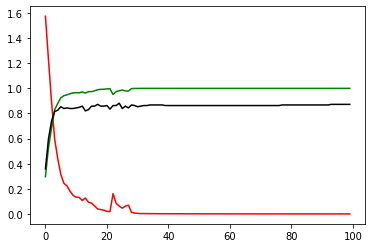

In [230]:
plt.plot(mlp_history.history['loss'],  color='red')
plt.plot(mlp_history.history['accuracy'],  color='green')
plt.plot(mlp_history.history['val_accuracy'], color='black')

# Convolution Net from Keras tutorial

In [233]:
X_test = test_dataset[:,0:450]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

In [234]:
conv_model = Sequential([
    Input(X_train.shape[1:]),
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    GlobalAveragePooling1D(),
    Dense(num_classes, activation='sigmoid')
])

conv_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [235]:
history = conv_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32,  verbose=1)

Epoch 1/100
54/54 [==============================] - 1s 10ms/step - loss: 1.4977 - accuracy: 0.3576 - val_loss: 1.5029 - val_accuracy: 0.2358
Epoch 2/100
54/54 [==============================] - 0s 7ms/step - loss: 1.3450 - accuracy: 0.4741 - val_loss: 1.4082 - val_accuracy: 0.4764
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 1.2358 - accuracy: 0.5600 - val_loss: 1.4138 - val_accuracy: 0.3302
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 1.1336 - accuracy: 0.6300 - val_loss: 1.4675 - val_accuracy: 0.3255
Epoch 5/100
54/54 [==============================] - 0s 7ms/step - loss: 1.0525 - accuracy: 0.6553 - val_loss: 1.2591 - val_accuracy: 0.3726
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.9933 - accuracy: 0.6571 - val_loss: 1.0703 - val_accuracy: 0.6226
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.9407 - accuracy: 0.6712 - val_loss: 1.4438 - val_accuracy: 0.4906
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4611 - accuracy: 0.8376 - val_loss: 0.5037 - val_accuracy: 0.8302
Epoch 60/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4558 - accuracy: 0.8465 - val_loss: 0.9217 - val_accuracy: 0.6604
Epoch 61/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4558 - accuracy: 0.8471 - val_loss: 0.5845 - val_accuracy: 0.8208
Epoch 62/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4577 - accuracy: 0.8382 - val_loss: 0.5076 - val_accuracy: 0.7925
Epoch 63/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4380 - accuracy: 0.8494 - val_loss: 0.5550 - val_accuracy: 0.8066
Epoch 64/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4351 - accuracy: 0.8553 - val_loss: 0.5773 - val_accuracy: 0.7830
Epoch 65/100
54/54 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8482 - val_loss: 0.7212 - val_accuracy: 0.7075
Epoch 

In [237]:
results = conv_model.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.7317


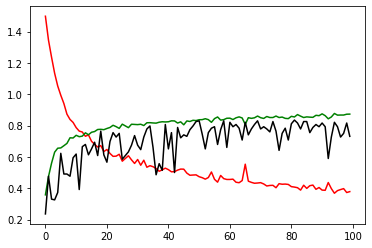

In [236]:
plt.plot(history.history['loss'],  color='red')
plt.plot(history.history['accuracy'],  color='green')
plt.plot(history.history['val_accuracy'], color='black')

# 2D Convolution Net 

In [238]:
X_test = test_dataset[:,0:450]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

X_train = X_train.reshape(-1, 3, 150, 1)
X_test = X_test.reshape(-1, 3, 150, 1)
X_val = X_val.reshape(-1, 3, 150, 1)

In [239]:
my_conv_model = Sequential([
    Input(X_train.shape[1:]),
    Conv2D(filters=64, kernel_size=(2, 16)),
    BatchNormalization(),
    ReLU(),
    
    Conv2D(filters=64, kernel_size=2),
    BatchNormalization(),
    ReLU(),
    
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='sigmoid')
])

my_conv_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [240]:
my_conv_history = my_conv_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=16,  verbose=1)

Epoch 1/100
107/107 [==============================] - 1s 6ms/step - loss: 1.1413 - accuracy: 0.6876 - val_loss: 0.8149 - val_accuracy: 0.7547
Epoch 2/100
107/107 [==============================] - 1s 5ms/step - loss: 0.7291 - accuracy: 0.8076 - val_loss: 0.5937 - val_accuracy: 0.8396
Epoch 3/100
107/107 [==============================] - 1s 5ms/step - loss: 0.5524 - accuracy: 0.8524 - val_loss: 0.4694 - val_accuracy: 0.8774
Epoch 4/100
107/107 [==============================] - 1s 5ms/step - loss: 0.4500 - accuracy: 0.8818 - val_loss: 0.4756 - val_accuracy: 0.8349
Epoch 5/100
107/107 [==============================] - 1s 5ms/step - loss: 0.3853 - accuracy: 0.8982 - val_loss: 0.3293 - val_accuracy: 0.8962
Epoch 6/100
107/107 [==============================] - 1s 5ms/step - loss: 0.3496 - accuracy: 0.8976 - val_loss: 0.2485 - val_accuracy: 0.9387
Epoch 7/100
107/107 [==============================] - 1s 5ms/step - loss: 0.3278 - accuracy: 0.9041 - val_loss: 0.2303 - val_accuracy: 0.9245

Epoch 58/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0992 - accuracy: 0.9682 - val_loss: 0.1095 - val_accuracy: 0.9575
Epoch 59/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0871 - accuracy: 0.9694 - val_loss: 0.1036 - val_accuracy: 0.9623
Epoch 60/100
107/107 [==============================] - 1s 5ms/step - loss: 0.1125 - accuracy: 0.9594 - val_loss: 0.0930 - val_accuracy: 0.9575
Epoch 61/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0970 - val_accuracy: 0.9575
Epoch 62/100
107/107 [==============================] - 0s 5ms/step - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.1789 - val_accuracy: 0.9292
Epoch 63/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0876 - accuracy: 0.9718 - val_loss: 0.0819 - val_accuracy: 0.9670
Epoch 64/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0928 - accuracy: 0.9741 - val_loss: 0.1093 - val_accuracy:

In [213]:
results = my_conv_model.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 1.0000


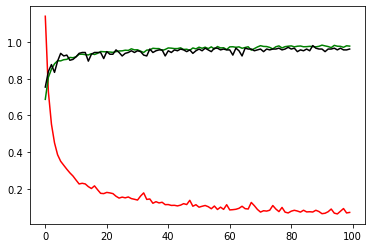

In [241]:
plt.plot(my_conv_history.history['loss'],  color='red')
plt.plot(my_conv_history.history['accuracy'],  color='green')
plt.plot(my_conv_history.history['val_accuracy'], color='black')